**Loading and analyzing the dataset for better result**

In [1]:
#Step 1: Importing necessary libraries
import pandas as pd

In [2]:
#Step 2: Load the dataset into jupyter notebook
data = pd.read_csv('OnlineRetail.csv')

In [3]:
#Step 3: Viewing 10 rows of data
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-1-2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-1-2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-1-2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-1-2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-1-2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12-1-2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12-1-2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12-1-2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12-1-2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12-1-2010 8:34,1.69,13047.0,United Kingdom


In [4]:
#Step 4: getting the dataset information and the total count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#Step 5: Checking for empty columns in dataset
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Step 6: Dropping the empty columns in dataset
data.dropna(inplace=True)

In [7]:
#Step 7: Dropping the duplicates values from dataset
data.drop_duplicates(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [9]:
#Step 8: displaying the unique product and customer count

#Here we use "stock code" for unique products and "CustomerID" for unique customers.
print(f'Number of unique products : {data['StockCode'].nunique()}')
print(f'Number of unique customers : {data['CustomerID'].nunique()}')

Number of unique products : 3684
Number of unique customers : 4372


In [10]:
#Displaying the top 10 products from the dataset
top_products = data['Description'].value_counts().head(10)
print (top_products)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: count, dtype: int64


**Lets visualize using plot for better analyzing**

In [11]:
#Step 1: importing necessary library
import seaborn as sns  
import matplotlib.pyplot as plt

In [12]:
#Step 2: Creating and displaying the pivot table to find the total quantity of each product bought by each customer
total_product_quantity = data.pivot_table(
    index = 'CustomerID',
    columns = 'Description',
    values = 'Quantity',
    aggfunc = 'sum',
    fill_value = 0
)
display(total_product_quantity)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


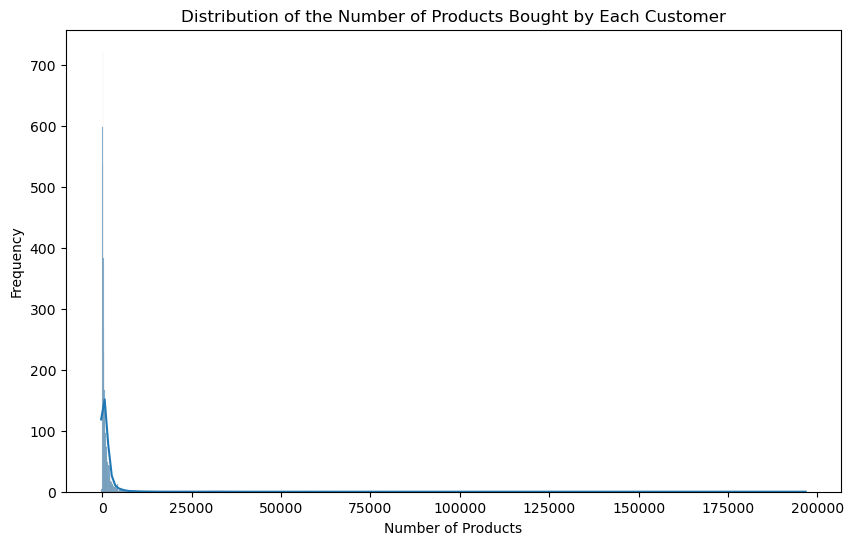

In [83]:
#Plot the distribution of the number of products bought by each customer using histogram

plt.figure(figsize=(10, 6))
sns.histplot(data=total_product_quantity.sum(axis=1), kde=True)
plt.title('Distribution of the Number of Products Bought by Each Customer')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

In [85]:
#Step 3: Identifying Globally Popular Products
globally_popular_products = data['Description'].value_counts().head(10)
print("Globally Popular Products:")
print(globally_popular_products)

Globally Popular Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: count, dtype: int64


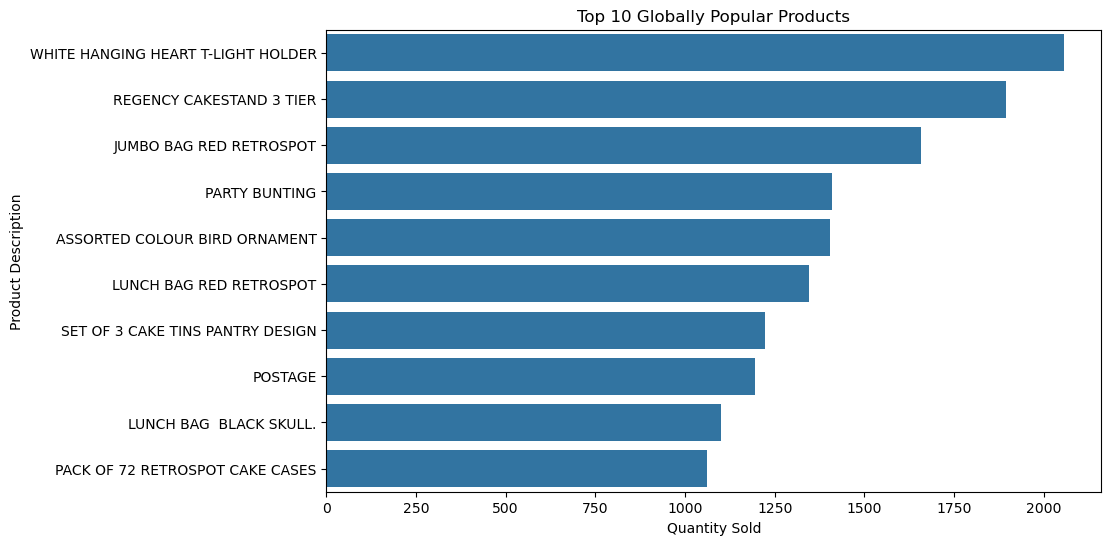

In [87]:
#Plotting globally popular products
plt.figure(figsize=(10, 6))
sns.barplot(x=globally_popular_products.values, y=globally_popular_products.index)
plt.title('Top 10 Globally Popular Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

In [89]:
#Step 4: Identify Country-wise Popular Products
country_popular_products = data.groupby('Country')['Description'].value_counts().groupby(level=0).nlargest(10).reset_index(level=0, drop=True).reset_index()
print("Country-wise Popular Products:")
print(country_popular_products.head(20)) 

Country-wise Popular Products:
      Country                         Description  count
0   Australia    SET OF 3 CAKE TINS PANTRY DESIGN     10
1   Australia             LUNCH BAG RED RETROSPOT      9
2   Australia       RED TOADSTOOL LED NIGHT LIGHT      9
3   Australia        BAKING SET 9 PIECE RETROSPOT      8
4   Australia          BAKING SET SPACEBOY DESIGN      8
5   Australia    HANGING HEART JAR T-LIGHT HOLDER      8
6   Australia           LUNCH BAG SPACEBOY DESIGN      8
7   Australia             PAPER BUNTING RETROSPOT      8
8   Australia                       PARTY BUNTING      8
9   Australia     ROSES REGENCY TEACUP AND SAUCER      8
10    Austria                             POSTAGE     14
11    Austria     RETROSPOT TEA SET CERAMIC 11 PC      4
12    Austria   ROUND SNACK BOXES SET OF 4 FRUITS      4
13    Austria  ROUND SNACK BOXES SET OF4 WOODLAND      4
14    Austria           BREAD BIN DINER STYLE RED      3
15    Austria            DOLLY GIRL BABY GIFT SET      3


Enter country name:  austria


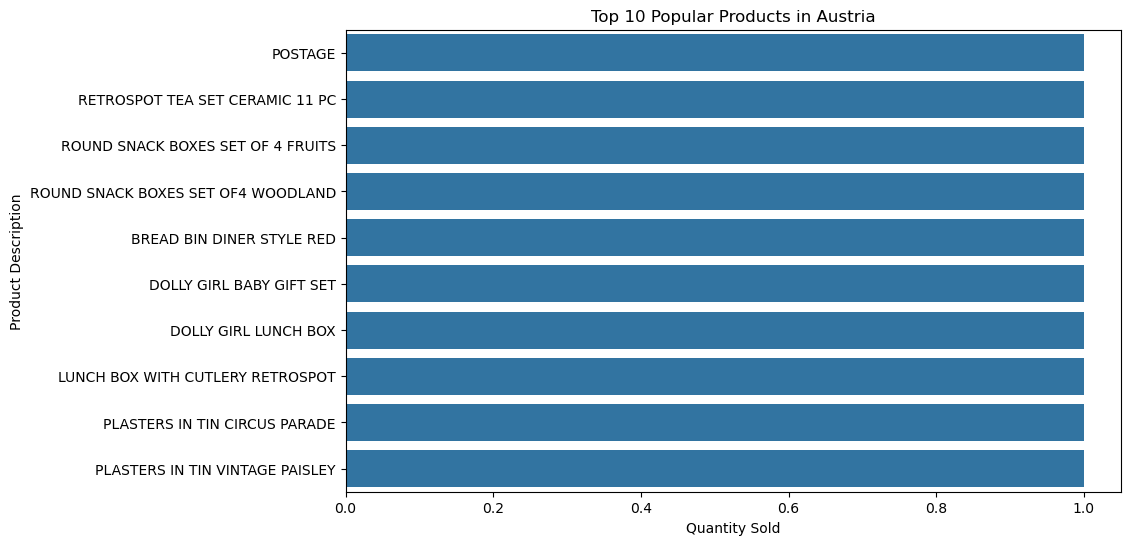

In [93]:
#Plot country-wise popular products for a specific country
country = input('Enter country name: ').capitalize()  # enter country from dataset
if country not in data['Country'].unique():
            print( f"Country name '{country}' not found in the data. check the country name.")
    
popular_products = country_popular_products[country_popular_products['Country'] == country]
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_products['Description'].value_counts().values, 
            y=popular_products['Description'].value_counts().index )
plt.title(f'Top 10 Popular Products in {country}')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

In [95]:
#Step 5: Identifying Month-wise Popular Products

#Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [97]:
#Extract month and year from InvoiceDate
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

In [99]:
month_popular_products = data.groupby('MonthYear')['Description'].value_counts().groupby(level=0).nlargest(10).reset_index(level=0, drop=True).reset_index()
print("Month-wise Popular Products:")
print(month_popular_products.head(20))

Month-wise Popular Products:
   MonthYear                         Description  count
0    2010-12  WHITE HANGING HEART T-LIGHT HOLDER    213
1    2010-12            REGENCY CAKESTAND 3 TIER    153
2    2010-12         HAND WARMER BABUSHKA DESIGN    141
3    2010-12      PAPER CHAIN KIT 50'S CHRISTMAS    137
4    2010-12        SCOTTIE DOG HOT WATER BOTTLE    130
5    2010-12          CHOCOLATE HOT WATER BOTTLE    123
6    2010-12               HEART OF WICKER SMALL    107
7    2010-12           HOT WATER BOTTLE BABUSHKA    107
8    2010-12              JAM MAKING SET PRINTED    107
9    2010-12   PAPER CHAIN KIT VINTAGE CHRISTMAS    106
10   2011-01  WHITE HANGING HEART T-LIGHT HOLDER    164
11   2011-01    SET OF 3 CAKE TINS PANTRY DESIGN    137
12   2011-01            REGENCY CAKESTAND 3 TIER    132
13   2011-01               HEART OF WICKER SMALL    119
14   2011-01      NATURAL SLATE HEART CHALKBOARD     96
15   2011-01       SET OF 3 HEART COOKIE CUTTERS     95
16   2011-01    RED

Enter year and month (yyyy-mm):  2011-01


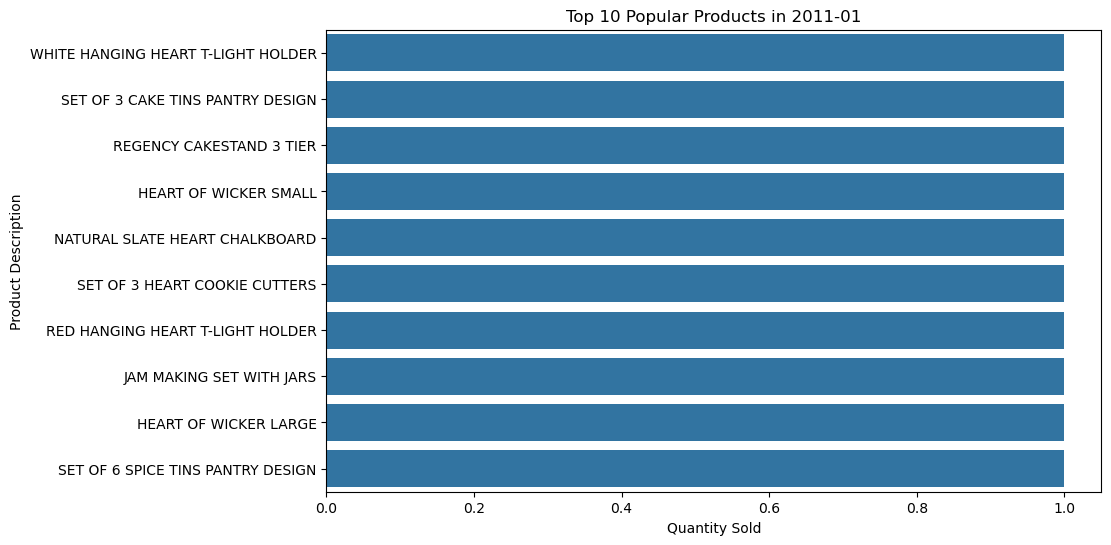

In [101]:
#Plot month-wise popular products for a specific month
specific_month = input('Enter year and month (yyyy-mm): ')
if specific_month not in data['MonthYear'].unique():
            print( f"Year and month not'{specific_month}' found in the data. check the year and month.")
monthly_popular_products = month_popular_products[month_popular_products['MonthYear'] == specific_month]
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_popular_products['Description'].value_counts().values, 
            y=monthly_popular_products['Description'].value_counts().index)
plt.title(f'Top 10 Popular Products in {specific_month}')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

**Getting product recommedations for customer**

Here I use collaborative filtering using the surprise library for getting recommendations

In [103]:
#Step 1: Importing necessary library
from surprise import Dataset, Reader, SVD 
from surprise.model_selection import cross_validate 

In [104]:
#Creating a Reader object and specifying the rating scale
reader = Reader(rating_scale=(0, data['Quantity'].max()))

In [105]:
#Creating the dataset from the pandas dataframe
data_for_surprise = Dataset.load_from_df(data[['CustomerID', 'StockCode', 'Quantity']], reader)

In [109]:
#Using the Singular value decomposition (SVD) algorithm for collaborative filtering
algo = SVD()

In [111]:
#Evaluating the algorithm with cross-validation
cross_validate(algo, data_for_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    80982.261480984.513580983.805580982.470480982.966680983.20350.8438  
MAE (testset)     80981.814280984.078680982.777080982.458280982.955780982.81670.7412  
Fit time          2.98    3.07    3.22    3.04    3.03    3.07    0.08    
Test time         0.64    0.34    0.55    0.51    0.63    0.53    0.11    


{'test_rmse': array([80982.26143101, 80984.51352719, 80983.80545102, 80982.47039541,
        80982.96659102]),
 'test_mae': array([80981.81415819, 80984.07858468, 80982.77700726, 80982.45819898,
        80982.95568974]),
 'fit_time': (2.9794485569000244,
  3.067841053009033,
  3.223778247833252,
  3.0433733463287354,
  3.025991439819336),
 'test_time': (0.6426393985748291,
  0.34101009368896484,
  0.5457763671875,
  0.5076525211334229,
  0.6278979778289795)}

In [113]:
#Training the model on the entire dataset
trainset = data_for_surprise.build_full_trainset()
algo.fit(trainset)

In [114]:
#Function to get top n recommendations for a given customer

def top_recommendations(customer_id, n=15):

    customer_id = float(customer_id)
    
    #list of all products
    all_products = data['Description'].unique()
    
    #list of products the customer has already bought
    purchased_products = data[data['CustomerID'] == customer_id]['Description'].unique()
    
    #list of products the customer has not bought yet 
    products_to_predict = [product_description for product_description in all_products if product_description not in purchased_products] 
    
    # Predict the ratings for all products the customer has not bought yet
    predictions = [algo.predict(customer_id, product_description) for product_description in products_to_predict]
    
    # Sort the predictions by estimated rating
    predictions.sort(key=lambda x: x.est)
        
    # top N recommendations
    top_recommendations = [pred.iid for pred in predictions[:n]]
    
    return top_recommendations

In [117]:
customer_id = float(input('Enter the Customer ID'))
if customer_id not in data['CustomerID'].unique():
            print(f"Customer ID {customer_id} not found in the data.")
else:
    top_product_recommendations = top_recommendations(customer_id, n=5)
    print(f'\nTop 10 recommendated products for {customer_id}:\n')

    for product in top_product_recommendations:
        print(product)

Enter the Customer ID 18283



Top 10 recommendated products for 18283.0:

WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES


In [119]:
customer_id = float(input('Enter the Customer ID'))
if customer_id not in data['CustomerID'].unique():
            print(f"Customer ID {customer_id} not found in the data.")
else:
    top_product_recommendations = top_recommendations(customer_id, n=5)
    print(f'\nTop 10 recommendated products for {customer_id}:\n')

    for product in top_product_recommendations:
        print(product)

Enter the Customer ID 12345


Customer ID 12345.0 not found in the data.
